## TrpR_IAA

Exemplary design of the trpytophane repressor (PDB: 1ZT9) with the ligand indole-3-acetic acid (IAA).

In [1]:
# This is a comment. It's marked by a leading "#" symbol

# Import OS and system libraries
import sys
import os
import logging

# Append the pocketoptimizer code to your $PYTHONPATH
cwd = os.getcwd()
project_dir = os.path.join(cwd, 'TrpR_IAA')
sys.path.append(os.path.join(cwd, '..'))

# Import Pocketoptimizer
import pocketoptimizer as po

# Remove most warnings, only show Errors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
# Initialize a new design pipeline
design = po.DesignPipeline(work_dir=project_dir, forcefield='amber_ff14SB', ph=7, ncpus=8)

2022-09-05 15:22:24,727 - pocketoptimizer.ui - INFO - Logging to: /agh/projects/jakob/pocketoptimizer/tutorials/TrpR_IAA/pocketoptimizer.log


In [3]:
# Prepare ligand
design.parameterize_ligand(input_ligand='ligand/IAA.sdf')

2022-09-05 15:22:26,983 - numexpr.utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-09-05 15:22:26,983 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
2022-09-05 15:22:27,673 - root - WARNING - Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.
2022-09-05 15:22:28,224 - pocketoptimizer.preparation.structure_building - INFO - Adding hydrogen atoms to the ligand according to pH: 7.
2022-09-05 15:22:28,613 - pocketoptimizer.preparation.structure_building - INFO - Parameterize ligand for GAFF2.
2022-09-05 15:22:28

In [4]:
design.prepare_protein(
    protein_structure='scaffold/1ZT9.pdb',  # Input PDB
    keep_chains=['A', 'B'],  # Specific protein chains to keep
    backbone_restraint=True, # Restrains the backbone during the minimization
    cuda=False,               # Performs minimization on CPU instead of GPU
    discard_mols=[{'chain': 'A', 'resid': '1001'}]     # Special molecules to exclude. Per default everything, but peptides have to be defined manually
    )

2022-09-05 15:22:30,765 - pocketoptimizer.ui - INFO - Start Protein Preparation.
2022-09-05 15:22:30,768 - pocketoptimizer.preparation.structure_building - INFO - Starting protein preparation.
2022-09-05 15:22:31,026 - pocketoptimizer.preparation.structure_building - INFO - Protonate protein according to pH: 7.
2022-09-05 15:22:31,246 - moleculekit.tools.preparation - WARNING - Both chains and segments are defined in Molecule.chain / Molecule.segid, however they are inconsistent. Protein preparation will use the chain information.



---- Molecule chain report ----
Chain A:
    First residue: SER     5  
    Final residue: LEU   105  
Chain B:
    First residue: SER     5  
    Final residue: TRP   901  
---- End of chain report ----



2022-09-05 15:22:33,259 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 A to HID
2022-09-05 15:22:33,260 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 A to HID
2022-09-05 15:22:33,260 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 B to HID
2022-09-05 15:22:33,261 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 B to HID
2022-09-05 15:22:33,262 - moleculekit.tools.preparation - WARNING - Dubious protonation state: the pKa of 2 residues is within 1.0 units of pH 7.0.
2022-09-05 15:22:33,263 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 A (pKa= 6.16)
2022-09-05 15:22:33,264 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 B (pKa= 6.24)
2022-09-05 15:22:33,869 - pocketoptimizer.preparation.structure_building - INFO - Successfully prepared protein structure.
2022-09-05 15:22:33,871 - pocketoptimizer.ui - INFO - Building complex before min

In [5]:
design.prepare_lig_conformers(
    nconfs=50,         # Maximum number of conformers to produce'
    method='genetic',  # Genetic method in OpenBabel, other option is confab
    score='rmsd',      # Filters conformers based on RMSD
    )

2022-09-05 15:23:04,745 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Starting ligand conformer generation using obabel.
2022-09-05 15:23:04,745 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Selected Method: genetic.
2022-09-05 15:23:05,328 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Generated 50 conformers.
2022-09-05 15:23:05,329 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Conformer sampling was successful.


In [6]:

# Your mutations
design.set_mutations([{'mutations': ['LEU', 'THR'], 'resid': '88', 'chain': 'B'}, 
                      {'mutations': ['ARG'], 'resid': '84', 'chain': 'B'}, 
                      {'mutations': ['LEU','THR'], 'resid': '44', 'chain': 'A'}]
)


2022-09-05 15:23:05,336 - pocketoptimizer.ui - INFO - If design positions are removed or added a new design run should be started.


In [7]:
# Prepares all defined mutants and glycine scaffolds for side chain rotamer and ligand pose sampling
design.prepare_mutants(sampling_pocket='GLY')

2022-09-05 15:23:05,855 - pocketoptimizer.ui - INFO - Start building mutated protein scaffold variants.
2022-09-05 15:23:05,856 - pocketoptimizer.ui - INFO - Build GLY sampling pockets.
2022-09-05 15:23:06,535 - pocketoptimizer.preparation.structure_building - INFO - Build ligand sampling pocket.
2022-09-05 15:23:07,021 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-09-05 15:23:07,369 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2022-09-05 15:23:07,763 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2022-09-05 15:23:09,379 - pocketoptimizer.preparation.structure_building - INFO - Build mutation: A_44_LEU.
2022-09-05 15:23:09,968 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-09-05 15:23:10,126 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2022-09-05 15:23:10,438 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2022-09-05 15:23:12,029 - 

In [8]:
ncpus = 8
# Sampling of side chain rotamers
design.sample_sidechain_rotamers(
    vdw_filter_thresh=100,   # Energy threshold of 100 kcal/mol
    library='dunbrack'       # Use dunbrack rotamer library
    )

2022-09-05 15:23:45,982 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Start rotamer sampling procedure using FFEvaluate.
2022-09-05 15:23:45,983 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Using 8 CPU's for multiprocessing.
2022-09-05 15:23:46,802 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_LEU not sampled yet.


A_44_LEU:   0%|          | 0/64 [00:00<?, ?it/s]

2022-09-05 15:23:57,879 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 27/64 rotamers within energy threshold of 100 kcal/mol for LEU at position: A_44.
2022-09-05 15:23:57,895 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_THR not sampled yet.


A_44_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-09-05 15:24:05,629 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 6/10 rotamers within energy threshold of 100 kcal/mol for THR at position: A_44.
2022-09-05 15:24:05,639 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_84_ARG not sampled yet.


B_84_ARG:   0%|          | 0/370 [00:00<?, ?it/s]

2022-09-05 15:24:34,705 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 328/370 rotamers within energy threshold of 100 kcal/mol for ARG at position: B_84.
2022-09-05 15:24:34,750 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_LEU not sampled yet.


B_88_LEU:   0%|          | 0/55 [00:00<?, ?it/s]

2022-09-05 15:24:44,744 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 23/55 rotamers within energy threshold of 100 kcal/mol for LEU at position: B_88.
2022-09-05 15:24:44,755 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_THR not sampled yet.


B_88_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-09-05 15:24:52,895 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 6/10 rotamers within energy threshold of 100 kcal/mol for THR at position: B_88.
2022-09-05 15:24:52,912 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamer sampling procedure is finished.


In [9]:
# Sampling of ligand poses
# Defines a grid in which the ligand is translated and rotated along.
#                       Range, Steps
sample_grid = {'trans': [1, 0.5],  # Angstrom
               'rot': [20, 20]}    # Degree
design.sample_lig_poses(
    method='grid',         #  Uses the grid method. Other option is random
    grid=sample_grid,      #  Defined grid for sampling    
    vdw_filter_thresh=100, #  Energy threshold of 100 kcal/mol
    max_poses=10000        #  Maximum number of poses
)

2022-09-05 15:24:52,970 - pocketoptimizer.ui - INFO - Sample ligand poses.
2022-09-05 15:24:52,972 - pocketoptimizer.sampling.ligand_poses - INFO - Start ligand pose sampling procedure.
2022-09-05 15:24:54,389 - pocketoptimizer.sampling.ligand_poses - INFO - Generate possible poses within the defined grid.


Ligand Conformers:   0%|          | 0/51 [00:00<?, ?it/s]

2022-09-05 15:24:54,474 - pocketoptimizer.sampling.ligand_poses - INFO - Created possible 4641 poses.
2022-09-05 15:24:54,474 - pocketoptimizer.sampling.ligand_poses - INFO - Start filtering poses.
2022-09-05 15:24:54,475 - pocketoptimizer.sampling.ligand_poses - INFO - Using 8 CPUs for multiprocessing.


Filter Poses:   0%|          | 0/4641 [00:00<?, ?it/s]

2022-09-05 15:27:24,079 - pocketoptimizer.sampling.ligand_poses - INFO - Calculated 1099 poses within energy threshold of 100 kcal/mol.
2022-09-05 15:27:24,117 - pocketoptimizer.sampling.ligand_poses - INFO - Pose sampling procedure was successful.


In [10]:
design.calculate_energies(
    scoring='vina',           #  Method to score protein-ligand interaction
)

2022-09-05 15:27:24,208 - pocketoptimizer.ui - INFO - Start energy calculations.
2022-09-05 15:27:24,208 - pocketoptimizer.ui - INFO - Using 8 CPUs for multiprocessing.
2022-09-05 15:27:24,209 - pocketoptimizer.ui - INFO - Calculate Sidechain-Scaffold Energies.
2022-09-05 15:27:24,210 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2022-09-05 15:27:24,289 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_LEU not computed yet.


  0%|          | 0/27 [00:00<?, ?it/s]

2022-09-05 15:27:32,174 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_THR not computed yet.


  0%|          | 0/6 [00:00<?, ?it/s]

2022-09-05 15:27:39,669 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_84_ARG not computed yet.


  0%|          | 0/328 [00:00<?, ?it/s]

2022-09-05 15:27:56,723 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_LEU not computed yet.


  0%|          | 0/23 [00:00<?, ?it/s]

2022-09-05 15:28:04,455 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_THR not computed yet.


  0%|          | 0/6 [00:00<?, ?it/s]

2022-09-05 15:28:11,312 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self calculation was successful.
2022-09-05 15:28:11,313 - pocketoptimizer.ui - INFO - Calculate Sidechain-Pair Energies.
2022-09-05 15:28:11,314 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2022-09-05 15:28:11,900 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_84_ARG not computed yet.


  0%|          | 0/8856 [00:00<?, ?it/s]

2022-09-05 15:31:04,669 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_84_ARG not computed yet.


  0%|          | 0/1968 [00:00<?, ?it/s]

2022-09-05 15:31:44,916 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_LEU not computed yet.


  0%|          | 0/621 [00:00<?, ?it/s]

2022-09-05 15:32:05,307 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_THR not computed yet.


  0%|          | 0/162 [00:00<?, ?it/s]

2022-09-05 15:32:15,996 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_LEU not computed yet.


  0%|          | 0/138 [00:00<?, ?it/s]

2022-09-05 15:32:25,815 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_THR not computed yet.


  0%|          | 0/36 [00:00<?, ?it/s]

2022-09-05 15:32:34,167 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_LEU not computed yet.


  0%|          | 0/7544 [00:00<?, ?it/s]

2022-09-05 15:35:03,583 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_THR not computed yet.


  0%|          | 0/1968 [00:00<?, ?it/s]

2022-09-05 15:35:44,059 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Pair calculation was successful.
2022-09-05 15:35:44,061 - pocketoptimizer.ui - INFO - Calculate Ligand-Scaffold/Sidechain-Interaction-Energies.
2022-09-05 15:35:44,062 - pocketoptimizer.scoring.smina_scorer - INFO - Score ligand interactions using vina.
2022-09-05 15:35:45,399 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Scaffold/Self interaction energy not computed yet.
2022-09-05 15:35:45,400 - pocketoptimizer.scoring.smina_scorer - INFO - Prepare fixed scaffold.


Ligand/Scaffold:   0%|          | 0/1 [00:00<?, ?it/s]

2022-09-05 15:35:47,751 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_LEU not computed yet.
2022-09-05 15:35:47,886 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_LEU.


Ligand/A_44_LEU:   0%|          | 0/27 [00:00<?, ?it/s]

2022-09-05 15:36:13,368 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_THR not computed yet.
2022-09-05 15:36:13,411 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_THR.


Ligand/A_44_THR:   0%|          | 0/6 [00:00<?, ?it/s]

2022-09-05 15:36:18,936 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_84_ARG not computed yet.
2022-09-05 15:36:19,736 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_84_ARG.


Ligand/B_84_ARG:   0%|          | 0/328 [00:00<?, ?it/s]

2022-09-05 15:41:17,807 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_LEU not computed yet.
2022-09-05 15:41:17,942 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_LEU.


Ligand/B_88_LEU:   0%|          | 0/23 [00:00<?, ?it/s]

2022-09-05 15:41:38,657 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_THR not computed yet.
2022-09-05 15:41:38,697 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_THR.


Ligand/B_88_THR:   0%|          | 0/6 [00:00<?, ?it/s]

2022-09-05 15:41:44,169 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand scoring was successful.
2022-09-05 15:41:44,170 - pocketoptimizer.ui - INFO - Energy calculation was successful.


2022-09-05 15:45:02,633 - pocketoptimizer.solving.sontag_solver - INFO - Calculating Solutions.


Solutions:   0%|          | 0/10 [00:00<?, ?it/s]

2022-09-05 15:45:59,013 - pocketoptimizer.ui - INFO - Parse calculated solutions.
2022-09-05 15:45:59,417 - pocketoptimizer.ui - INFO - Read 10 solution(s) from solver output.
2022-09-05 15:46:03,293 - pocketoptimizer.ui - INFO - Write text report.
2022-09-05 15:46:03,339 - pocketoptimizer.ui - INFO - Wrote solution report text file(s).
2022-09-05 15:46:03,342 - pocketoptimizer.ui - INFO - Wrote summary text file.
2022-09-05 15:46:03,342 - pocketoptimizer.ui - INFO - Write html report.
2022-09-05 15:46:03,421 - pocketoptimizer.ui - INFO - Wrote solution report html file(s).
2022-09-05 15:46:03,423 - pocketoptimizer.design.html_reporter - INFO - Create energy plot.
2022-09-05 15:46:03,792 - pocketoptimizer.design.html_reporter - INFO - Create sequence logo for mutable positions.


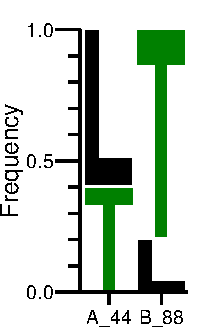

2022-09-05 15:46:04,235 - pocketoptimizer.ui - INFO - Wrote summary html file.
2022-09-05 15:46:04,236 - pocketoptimizer.ui - INFO - Creating design structure files.
2022-09-05 15:46:04,237 - pocketoptimizer.ui - INFO - Create Structures.
2022-09-05 15:46:14,087 - pocketoptimizer.ui - INFO - Creating PyMol scripts.
2022-09-05 15:46:14,106 - pocketoptimizer.ui - INFO - 10 best design solution(s) for design with forcefield: amber_ff14SB, scoring method: vina and ligand scaling: 5 identified.


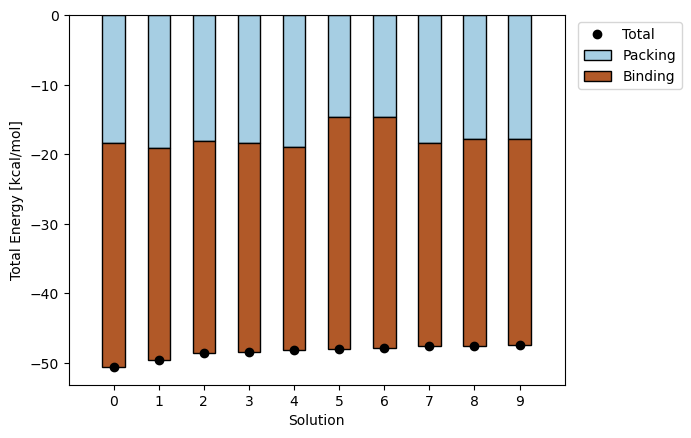

In [12]:
# Compute the lowest energy structures using linear programming
design.design(
    num_solutions=10,           #  Number of solutions to compute
    ligand_scaling=5,          #  Scaling factor for binding-related energies
)

In [14]:
# Do not run this unless you wanna fully clean your working directory from all created files and folders
design.clean(scaffold=True, ligand=True)

2022-09-05 15:21:53,338 - pocketoptimizer.ui - INFO - All scaffold files are deleted.
2022-09-05 15:21:53,654 - pocketoptimizer.ui - INFO - All ligand files are deleted.
2022-09-05 15:21:53,786 - pocketoptimizer.ui - INFO - Deleted settings file.
2022-09-05 15:21:53,791 - pocketoptimizer.ui - INFO - Deleted log file.
2022-09-05 15:21:53,792 - pocketoptimizer.ui - INFO - All files were deleted.
2022-09-05 15:21:53,794 - pocketoptimizer.ui - INFO - Initialize a new DesignPipeline.
